<a href="https://colab.research.google.com/github/ArthurLazdin/Machine-Learning/blob/main/Hotels_Bookingt__base_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Заселится клиент или не заселится?


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
hotel_resrv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning/Data/Hotel Reservations.csv')


## Описание набора.
[Набор](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) представляет собой информацию о бронировании отелей в онлайн режиме и предназначен для обучения модели-классификатора, которая будет прогнозировать заселится ли клиент или откажется от бронирования.
Набор включает следующие переменные:

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.
Целевой переменной является booking_status.


In [4]:
hotel_resrv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

В наборе нет пропусков. Это не может не радовать. Посмотрим на примерное содержимое переменных.

In [5]:
hotel_resrv.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
hotel_resrv.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


##Краткий обзор. 
Четыре переменных, включая целевую являются строковыми. Это нужно исправить. Кроме того даты предполагаемого заселения хранятся очень неудобно. Понятно, что идентификатор клиента ни на что не влияет и его можно удалить сразу.
Еще хорошо бы сократить длины названий переменных для увеличения удобства работы с данными.


In [7]:
# преобразуем целевую переменную
booking_st  = {'Canceled': 0, 'Not_Canceled': 1}
hotel_resrv['booking_status'] = hotel_resrv['booking_status'].map(booking_st)

# удалим идентификаторы
hotel_resrv.drop(['Booking_ID'], axis=1, inplace=True)

In [8]:
#преобразуем переменную room_type_reserved
room_type = hotel_resrv['room_type_reserved'].unique()
temp_list = np.arange(len(room_type))

room_tipe_dict = dict(zip(room_type, temp_list))
hotel_resrv['room_type_reserved'] = hotel_resrv['room_type_reserved'].map(room_tipe_dict)


In [9]:
segment_type = hotel_resrv['market_segment_type'].unique()
temp_list = np.arange(len(segment_type))

segment_tipe_dict = dict(zip(segment_type, temp_list))
hotel_resrv['market_segment_type'] = hotel_resrv['market_segment_type'].map(segment_tipe_dict)

In [10]:
meal_plan = hotel_resrv['type_of_meal_plan'].unique()
temp_list = np.arange(len(meal_plan))

meal_plan_dict = dict(zip(meal_plan, temp_list))
hotel_resrv['type_of_meal_plan'] = hotel_resrv['type_of_meal_plan'].map(meal_plan_dict)

Все строковое переменные заменили на числовые.

Допустим следующую гипотезу:

no_of_weekend_nights | no_of_week_nights | тип отдыха
---------------------|-------------------|-----------
   не равно нулю     |   ноль            |  поездка выходного дня
   ноль              |   не равно нулю   |  командировка
   не равно нулю     |   не равно нулю   |  отпуск

Заменим эти столбцы в соответствии с нашей гипотезой.

In [11]:
no_nights = []
for i in hotel_resrv.index:
  if hotel_resrv.iloc[i]['no_of_weekend_nights'] > 0 and hotel_resrv.iloc[i]['no_of_week_nights'] == 0:
    no_nights.append(-1)    # Поездка на выходные дни
  elif hotel_resrv.iloc[i]['no_of_week_nights'] > 0 and hotel_resrv.iloc[i]['no_of_weekend_nights'] == 0:
    no_nights.append(0)     # Командировка (только будни)
  else:
     no_nights.append(1)    # Отпуск

hotel_resrv.drop([ 'no_of_weekend_nights', 'no_of_week_nights'], axis=1, inplace=True)

hotel_resrv.insert(2, 'rest_type', no_nights)

## Внезапная проблема.
Для 37 строк в дататесте указано 29 февраля 2018 года, чего в природе не бывает, и соответсвующая функция datetime из модуля datetime отказывается преобразовывать тройки чисел 2018, 2, 29 в даты.

Было принято решение заменить 29 число на 28.

In [12]:
# Попытка оценить масштаб катастрофы.

dates = hotel_resrv[['arrival_year','arrival_month','arrival_date']]

error_date_list = []
for i in dates.index:
  if dates.iloc[i]['arrival_month'] == 2 and dates.iloc[i]['arrival_date'] == 29:
    dates.iloc[i]['arrival_date'] = 28
    error_date_list.append(i)
print(len(error_date_list)) 

37


In [13]:
# преобразуем дату предполагаемого заселения
dates_new=[]
for i in range(len(dates.index)):
    dates_new.append(datetime(dates.iloc[i]['arrival_year'], dates.iloc[i]['arrival_month'], dates.iloc[i]['arrival_date']))

# удаляем исходные переменные с датами "вразбивку"
hotel_resrv.drop([ 'arrival_year','arrival_month','arrival_date'], axis=1, inplace=True)

hotel_resrv.insert(7, 'booking_date',dates_new)
hotel_resrv.head()

,no_of_adults,no_of_children,rest_type,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,booking_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,0,0,0,224,2017-10-02,0,0,0,0,65.00,0,1
1,2,0,1,1,0,0,5,2018-11-06,1,0,0,0,106.68,1,1
2,1,0,1,0,0,0,1,2018-02-28,1,0,0,0,60.00,0,0
3,2,0,0,0,0,0,211,2018-05-20,1,0,0,0,100.00,0,0
4,2,0,1,1,0,0,48,2018-04-11,1,0,0,0,94.50,0,0


##EDA
Рассмотрим влияние значений no_of_previous_cancellations	и no_of_previous_bookings_not_canceled на принятие решения о заселении.

In [14]:
no_cancel = len(hotel_resrv[hotel_resrv['no_of_previous_bookings_not_canceled'] == 0 ])
cancel = len(hotel_resrv[hotel_resrv['no_of_previous_cancellations'] == 0 ])
total = len(hotel_resrv)
print('No cancel = ' , (no_cancel / total)*100, '%   Cancel = ', (cancel/total)*100 ,'%')

No cancel =  97.76154376292212 %   Cancel =  99.06822880771881 %


Видно, что пользы от них исчезающе мало.
Поэтому мы удалим эти столбцы из датасета.

In [15]:
hotel_resrv.drop([ 'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations'], axis=1, inplace=True)

Проверим гипотезу о типах заселения: выходные, командировка, отпуск.
Работает.

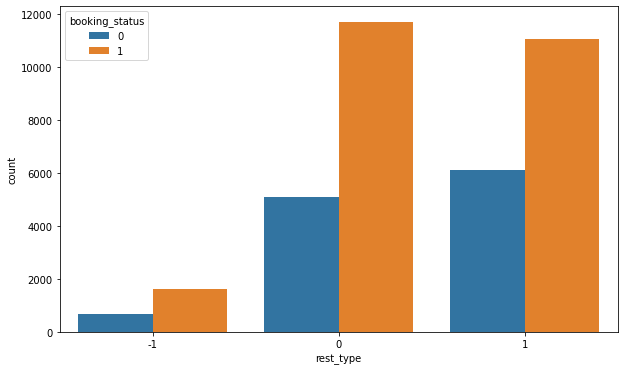

In [16]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'rest_type', hue = 'booking_status', data = hotel_resrv)

Посиотрим что с таким признаком, как required_car_parking_space.
Судя по графику ниже он важен. Оставляем. 

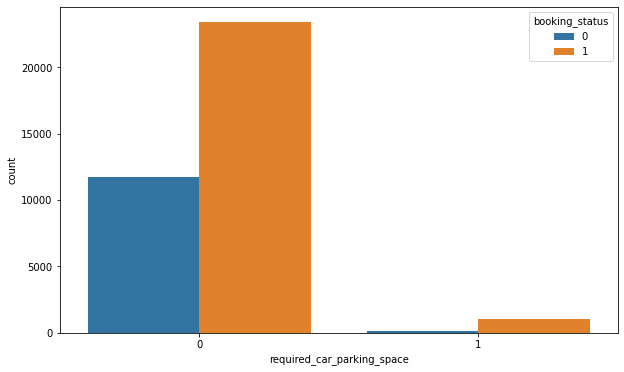

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'required_car_parking_space', hue = 'booking_status', data = hotel_resrv)

Попробуем разобраться с ценой комнаты. Это изначально едиственная существенная количественная характеристика. Причем ее значения существенно превышают значения остальных переменных, что предполагает нормализацию этой переменной.
Но это имеет смысл делать после разделения данных на тренировочный и тестовый наборы.

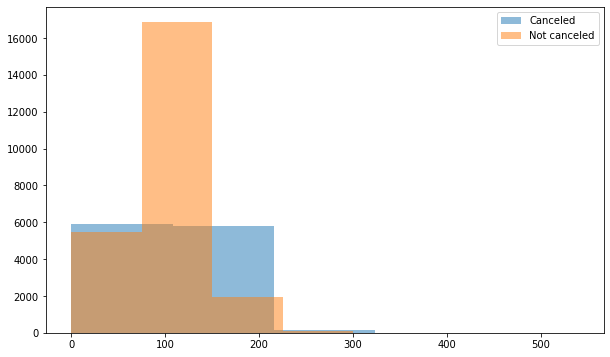

In [18]:
# задаем количество интервалов
bins = 5
 
# и размер графика
plt.figure(figsize = (10,6))
 

plt.hist(hotel_resrv.loc[hotel_resrv['booking_status'] == 0, 'avg_price_per_room'], bins, alpha = 0.5, label = 'Canceled')
plt.hist(hotel_resrv.loc[hotel_resrv['booking_status'] == 1, 'avg_price_per_room'], bins, alpha = 0.5, label = 'Not canceled')
plt.legend(loc = 'upper right')

 

Данные по цене имеет смысл оставить.
Займемся анализом вркменных интервалов. 
Посмотрим (plotly нам в помощь) на временные соотношения отказов и подтверждений бронирования. 

In [19]:
diff_dates = hotel_resrv['booking_date'].unique()
diff_dates.sort()

cancel_num = []
not_cancel_num = []

for day in diff_dates:
  c= len(hotel_resrv[(hotel_resrv['booking_date'] == day) & (hotel_resrv['booking_status'] == 0)])
  nc = len(hotel_resrv[(hotel_resrv['booking_date'] == day) & (hotel_resrv['booking_status'] == 1)])
  cancel_num.append(c)
  not_cancel_num.append(nc)
df = pd.DataFrame({'Date':diff_dates, 'Cancel': cancel_num, 'Not cancel': not_cancel_num})
df.head()

,Date,Cancel,Not cancel
0,2017-07-01,52,16
1,2017-07-02,5,0
2,2017-07-03,2,1
3,2017-07-04,4,0
4,2017-07-05,3,0


In [20]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure([go.Scatter(x=df['Date'], y=df['Cancel'])])
fig.show()

fig1 = go.Figure([go.Scatter(x=df['Date'], y=df['Not cancel'])])
fig1.show()

Непонятно. Почему 13 октября 2018 года пик подтверждений, а на 15 июня того же года наблюдаем пик отказов понять сложно. Похоже эти данные не коррелируются. Или?
Давайте для интереса построим корреляционную матрицу.

## Построим корреляционную матрицу.
Интересно, хотя два самых коррелируемых значения - это число детей и число комнат. 
Подробно займемся анализом матрицы в ходе работы над третим заданием.

In [21]:
import plotly.figure_factory as ff
corrs = hotel_resrv.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

А пока удалим данные о датах. Потому что они не числа. И модель на них не обучить. 

In [22]:
hotel_resrv.drop(['booking_date'], axis=1, inplace=True)


## Строим модель.

In [23]:
feature_names = list(hotel_resrv).copy()
feature_names.remove('booking_status')

feature_names

['no_of_adults',
 'no_of_children',
 'rest_type',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'market_segment_type',
 'repeated_guest',
 'avg_price_per_room',
 'no_of_special_requests']

In [24]:
# выделчем отдельно целевую переменную
target = hotel_resrv['booking_status']

# создаем датасет из выбранных переменных кроме целевой
temp = hotel_resrv
temp.drop(['booking_status'], axis=1, inplace=True)



### Нормализуем данные.

In [25]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()

scaled_temp = scaler.fit_transform(temp)

X = pd.DataFrame(scaled_temp, columns = feature_names) 
y = target


X.head()

,no_of_adults,no_of_children,rest_type,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,avg_price_per_room,no_of_special_requests
0,0.298893,-0.26147,0.971503,-0.511039,-0.178819,-0.434572,1.614896,-1.243838,-0.16221,-1.095033,-0.78814
1,0.298893,-0.26147,0.971503,1.065988,-0.178819,-0.434572,-0.933701,0.302063,-0.16221,0.092806,0.48376
2,-1.628975,-0.26147,0.971503,-0.511039,-0.178819,-0.434572,-0.980250,0.302063,-0.16221,-1.237528,-0.78814
3,0.298893,-0.26147,-0.674363,-0.511039,-0.178819,-0.434572,1.463610,0.302063,-0.16221,-0.097567,-0.78814
4,0.298893,-0.26147,0.971503,1.065988,-0.178819,-0.434572,-0.433291,0.302063,-0.16221,-0.254312,-0.78814


In [26]:
from sklearn.model_selection import train_test_split
 
# размер тестовой выборки составит 25%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)


In [27]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression
 
# создадим объект этого класса и запишем его в переменную model
model = LogisticRegression()

# обучим нашу модель
model.fit(X_train, y_train)
 
# выполним предсказание класса на тестовой выборке
y_pred = model.predict(X_test)

#тестовая печать
print(type(y_pred))
print(len(y_pred))


<class 'numpy.ndarray'>
9069


## Оценим модель.

In [28]:
from sklearn.metrics import accuracy_score
 
model_accuracy = accuracy_score(y_test, y_pred)
round(model_accuracy, 4)

0.7867

Или руками

In [29]:
from sklearn.metrics import confusion_matrix
 
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
 
# для удобства создадим датафрейм
model_matrix_df = pd.DataFrame(model_matrix)
print(model_matrix_df)
print((5429+1706)/(5429+614+1320+1706))

      0     1
0  5429   614
1  1320  1706
0.7867460579997795
